In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data={
    'Age':np.random.randint(20,80,100),
    'BMI':np.random.randint(18,35,100),
    'Smoking':np.random.randint(0,2,100),
    'AlcoholConsumption':np.random.randint(0,4,100),
    'PhysicalActivity':np.random.randint(0,4,100),
    'ChronicDisease':np.random.randint(0,2,100)
}
non_clinical_data=pd.DataFrame(data)
print(non_clinical_data.head(5))  
non_clinical_data.isnull().sum()

   Age  BMI  Smoking  AlcoholConsumption  PhysicalActivity  ChronicDisease
0   30   24        0                   1                 0               0
1   22   23        1                   2                 2               1
2   47   20        0                   3                 0               0
3   50   27        1                   0                 1               0
4   72   18        0                   3                 2               0


Age                   0
BMI                   0
Smoking               0
AlcoholConsumption    0
PhysicalActivity      0
ChronicDisease        0
dtype: int64

In [3]:
features=['Age','BMI','Smoking','AlcoholConsumption','PhysicalActivity','ChronicDisease']
scaler=StandardScaler()
non_clinical_data[features]=scaler.fit_transform(non_clinical_data[features])
non_clinical_data.head()

,Age,BMI,Smoking,AlcoholConsumption,PhysicalActivity,ChronicDisease
0,-1.155384,-0.460900,-1.151339,-0.591649,-1.233905,-0.850963
1,-1.622441,-0.663939,0.868554,0.304789,0.664411,1.175139
2,-0.162886,-1.273058,-1.151339,1.201226,-1.233905,-0.850963
3,0.012260,0.148219,0.868554,-1.488086,-0.284747,-0.850963
4,1.296668,-1.679137,-1.151339,1.201226,0.664411,-0.850963


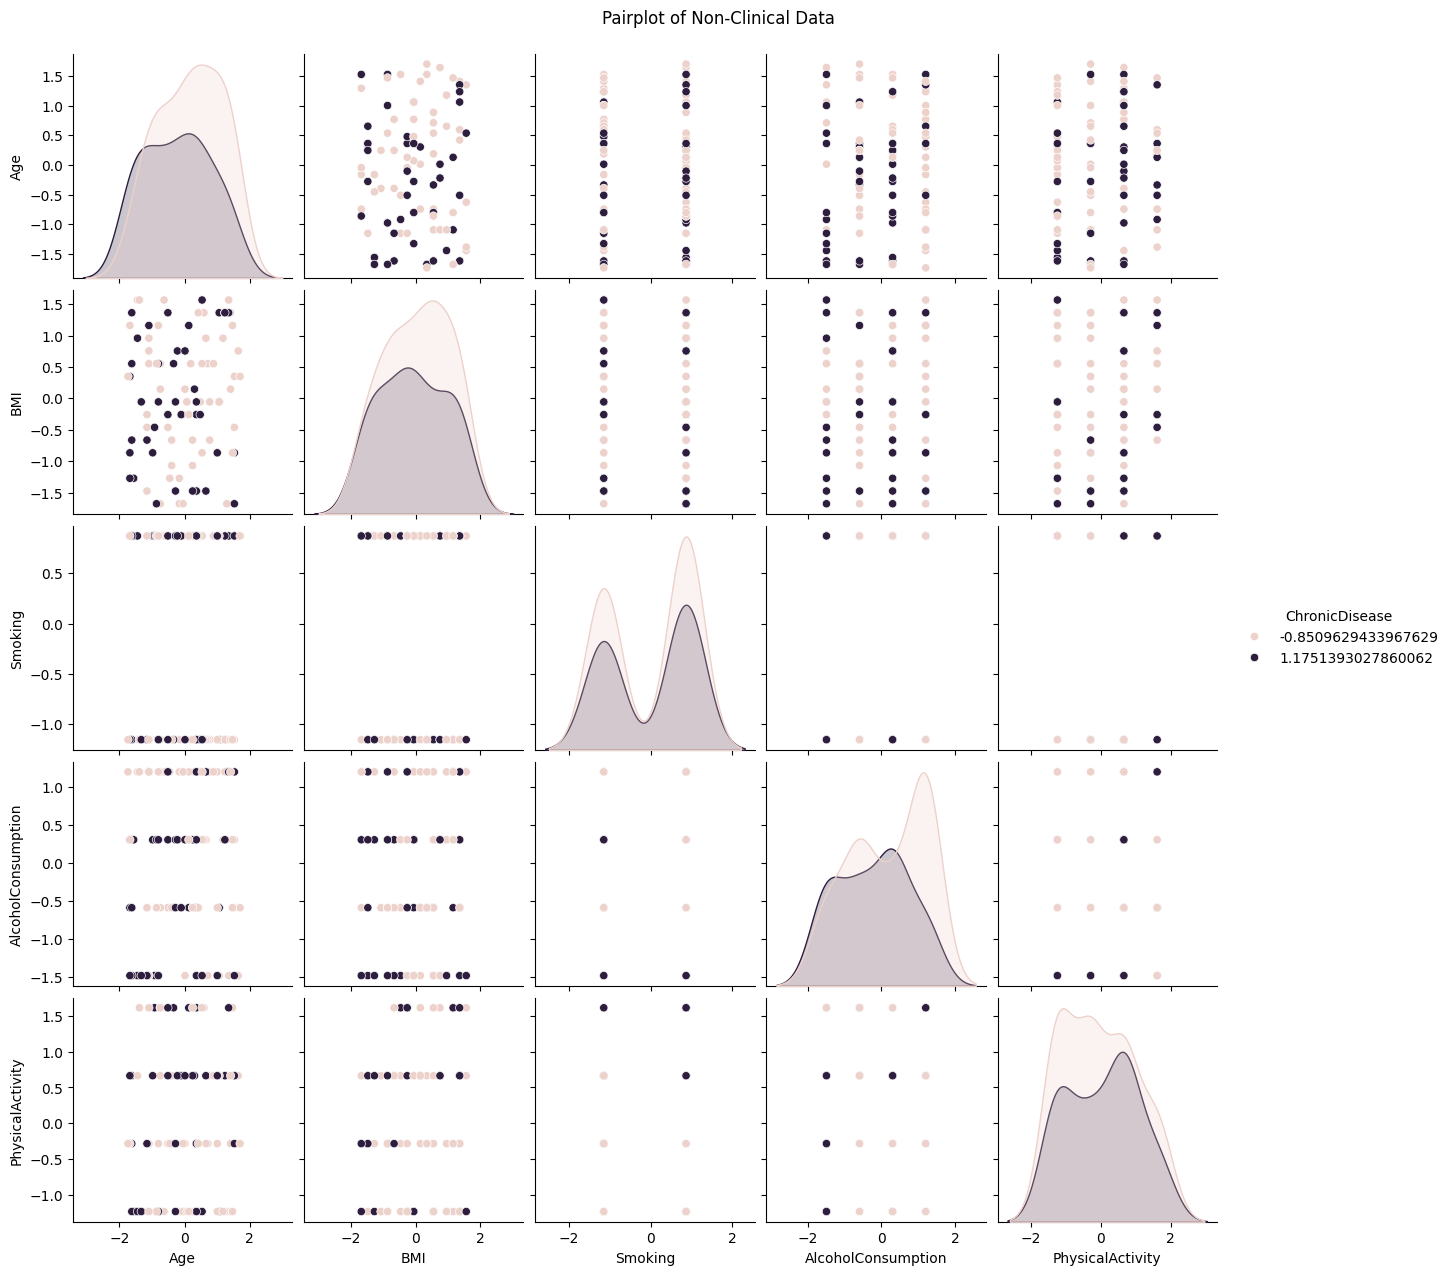

In [5]:
sns.pairplot(non_clinical_data,hue='ChronicDisease')
plt.suptitle('Pairplot of Non-Clinical Data',y=1.02)
plt.show()

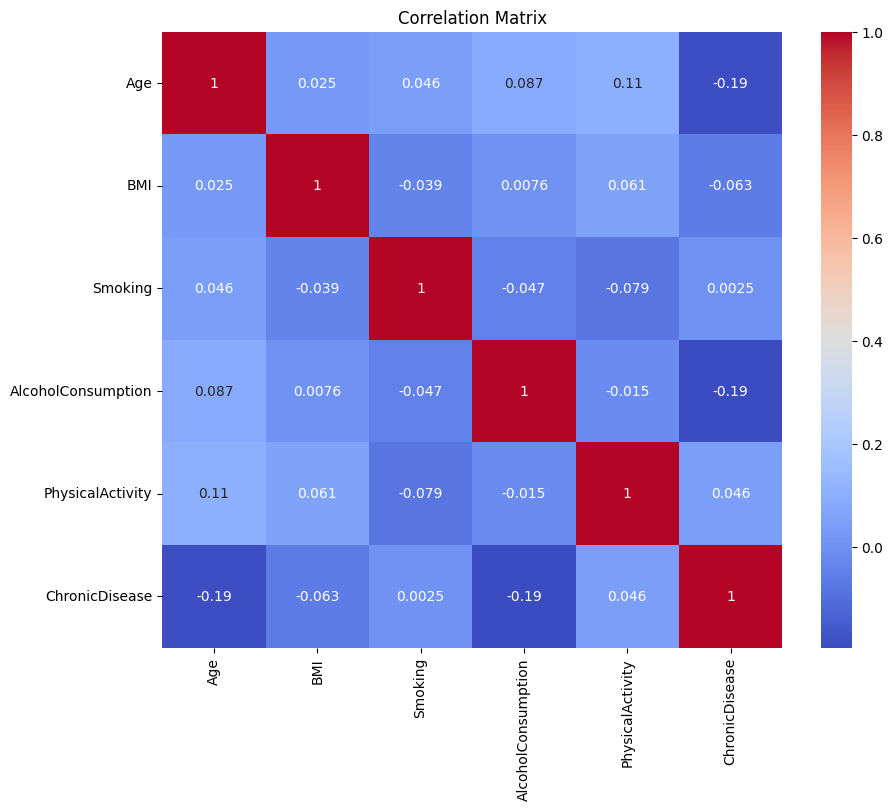

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(non_clinical_data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(non_clinical_data[features])
pca_df=pd.DataFrame(data=principal_components,columns=['PC1','PC2'])
pca_df['ChronicDisease']=non_clinical_data['ChronicDisease']


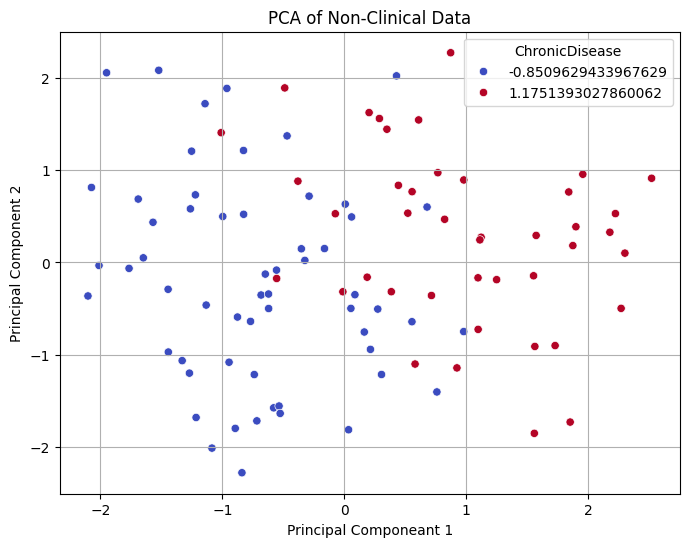

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1',y='PC2',hue='ChronicDisease',data=pca_df,palette='coolwarm')
plt.title('PCA of Non-Clinical Data')
plt.xlabel('Principal Componeant 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [9]:
kmeans=KMeans(n_clusters=2,random_state=0,n_init=10)
non_clinical_data['Cluster']=kmeans.fit_predict(non_clinical_data[features])
pca_df['Cluster']=non_clinical_data['Cluster']

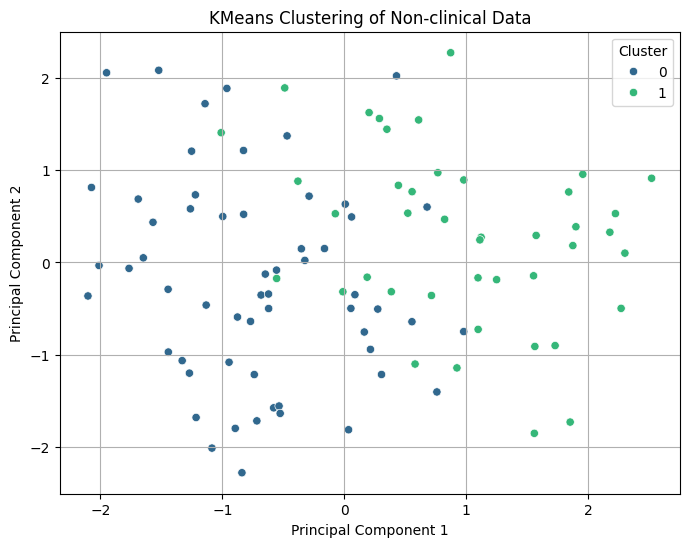

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1',y='PC2',hue='Cluster',data=pca_df,palette='viridis')
plt.title('KMeans Clustering of Non-clinical Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
